<a href="https://colab.research.google.com/github/mateuszsiwy/AOProjekt/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo

wine = fetch_ucirepo(id=186)
X = wine.data.features
y = wine.data.targets



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7174 - loss: 0.5496 - val_accuracy: 0.7485 - val_loss: 0.4999
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7619 - loss: 0.4838 - val_accuracy: 0.7638 - val_loss: 0.4860
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7748 - loss: 0.4794 - val_accuracy: 0.7785 - val_loss: 0.4774
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7784 - loss: 0.4670 - val_accuracy: 0.7669 - val_loss: 0.4843
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7864 - loss: 0.4650 - val_accuracy: 0.7585 - val_loss: 0.4943
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7778 - loss: 0.4593 - val_accuracy: 0.7646 - val_loss: 0.4789
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7873 - loss: 0.4416 - val_accuracy: 0.7523 - val_loss: 0.4770
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7949 - loss: 0.4257 - val_accuracy: 0.761

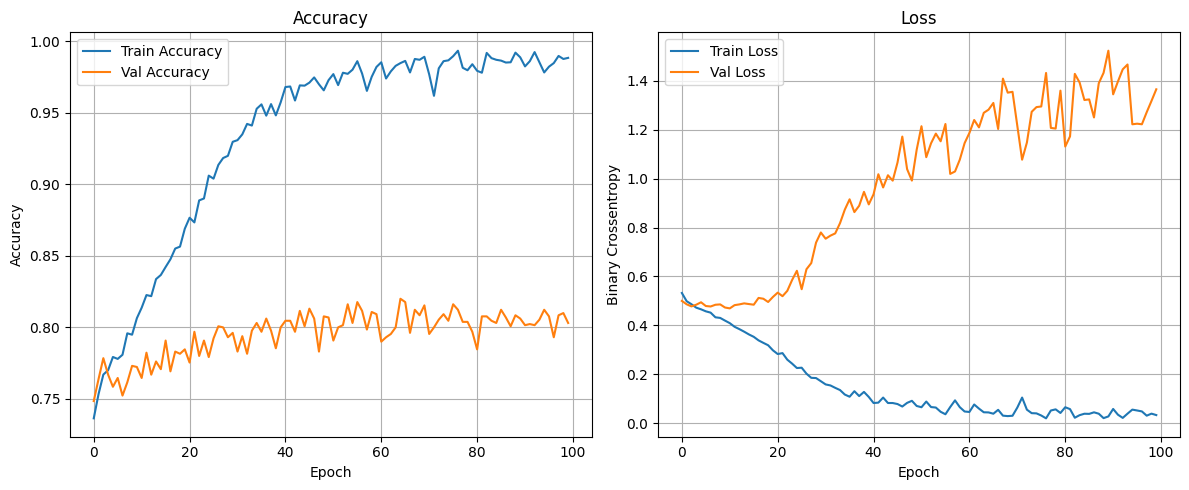

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import time
wine = fetch_ucirepo(id=186)
X = wine.data.features
y = wine.data.targets.values.ravel()

y_binary = (y >= 6).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

start = time.time()

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


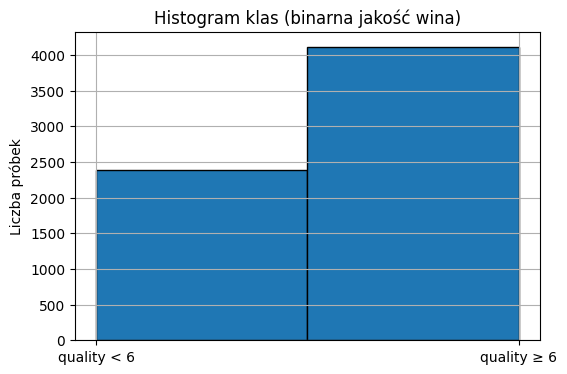

In [12]:
plt.figure(figsize=(6, 4))
plt.hist(y_binary, bins=2, edgecolor='k')
plt.xticks([0, 1], ['quality < 6', 'quality ≥ 6'])
plt.title('Histogram klas (binarna jakość wina)')
plt.ylabel('Liczba próbek')
plt.grid(True)
plt.show()


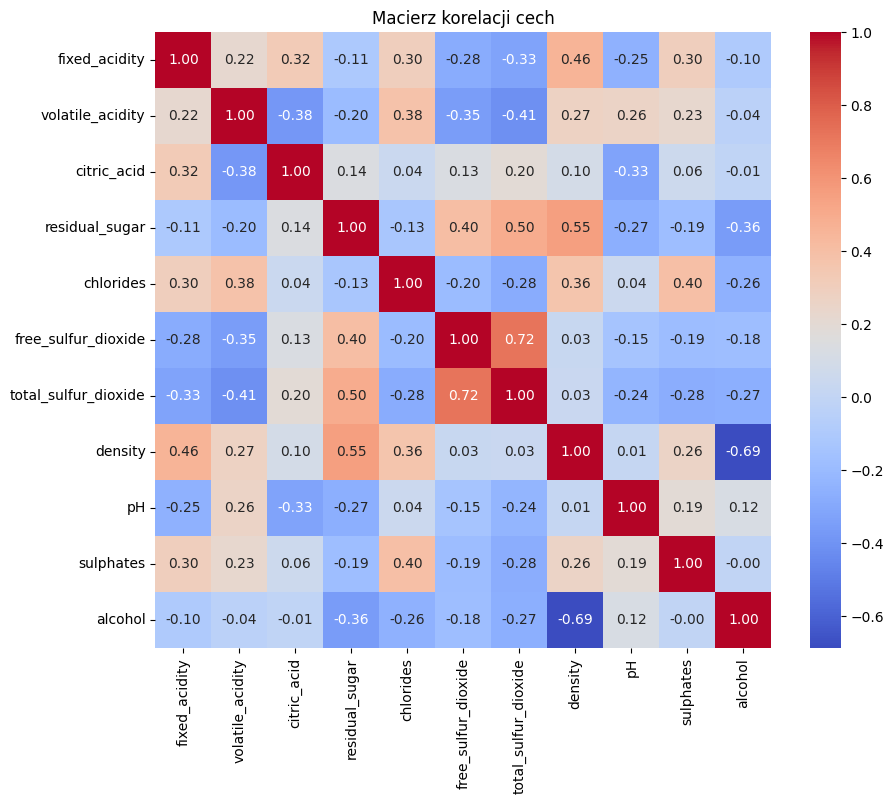

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 8))
corr_matrix = pd.DataFrame(X).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Macierz korelacji cech")
plt.show()


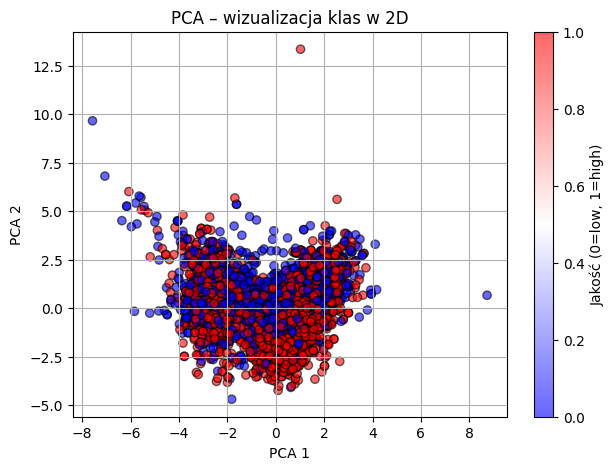

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='bwr', alpha=0.6, edgecolors='k')
plt.title('PCA – wizualizacja klas w 2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.colorbar(label='Jakość (0=low, 1=high)')
plt.show()


Jak widac, nasze dwie klasy bardzo na siebie nachodza, informuje nas to, ze klasyfikacja w tym wypadku bedzie trudna

In [15]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history1, name1, history2, name2):
    plt.figure(figsize=(12, 5))

    # Wykres dokładności
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], label=f'{name1} - Train')
    plt.plot(history1.history['val_accuracy'], label=f'{name1} - Val')
    plt.plot(history2.history['accuracy'], label=f'{name2} - Train', linestyle='--')
    plt.plot(history2.history['val_accuracy'], label=f'{name2} - Val', linestyle='--')
    plt.title('Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Wykres straty
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], label=f'{name1} - Train')
    plt.plot(history1.history['val_loss'], label=f'{name1} - Val')
    plt.plot(history2.history['loss'], label=f'{name2} - Train', linestyle='--')
    plt.plot(history2.history['val_loss'], label=f'{name2} - Val', linestyle='--')
    plt.title('Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


# 1. Uproszczenie modelu

In [16]:
small_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

small_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

start = time.time()


small_history = small_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)



print(f"Czas wykonania: {end - start} sekund")



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5931 - loss: 0.6619 - val_accuracy: 0.7300 - val_loss: 0.5446
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7411 - loss: 0.5276 - val_accuracy: 0.7477 - val_loss: 0.5130
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7599 - loss: 0.4995 - val_accuracy: 0.7423 - val_loss: 0.5038
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7569 - loss: 0.4950 - val_accuracy: 0.7515 - val_loss: 0.5010
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7608 - loss: 0.4971 - val_accuracy: 0.7538 - val_loss: 0.4925
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7654 - loss: 0.4890 - val_accuracy: 0.7569 - val_loss: 0.4916
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7768 - loss: 0.4755 - val_accuracy: 0.7623 - val_loss: 0.4905
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7688 - loss: 0.4818 - val_accuracy: 0.7608

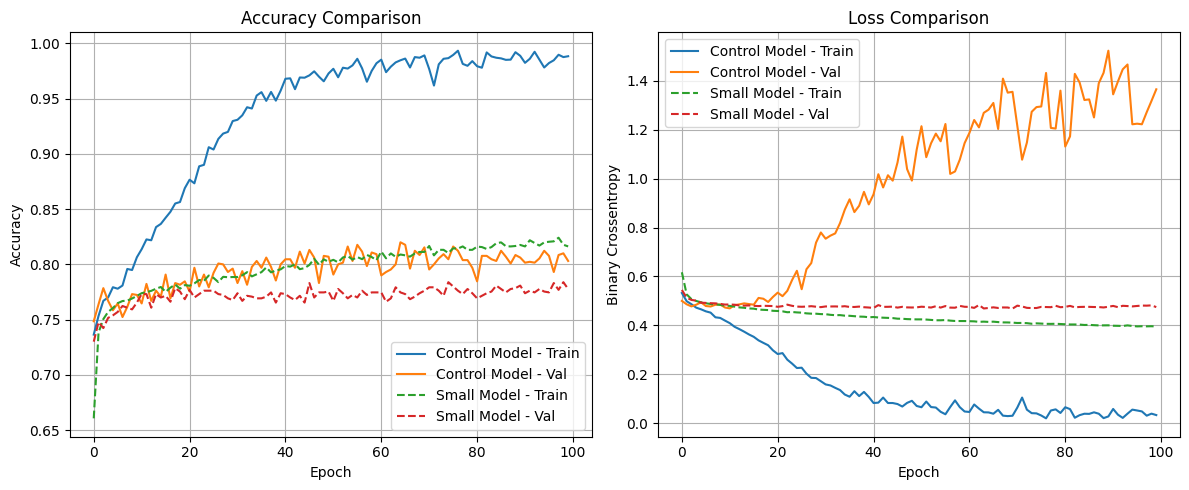

In [17]:
end = time.time()
plot_accuracy_and_loss(history, 'Control Model', small_history, 'Small Model')

## Ocena
Z powyszego wykresu mozna wnioskowac, ze uproszczenie modelu pomoglo z generalizacja modelu, wykresy strat dla danych testowych i danych walidacyjnych prwaie sie pokrywaja, co jest znacznym plusem

## Uwaga
Z powyzszych wykresow wynika rowniez ze model osiagnal *gorsza* dokladnosc niz poprzedni przeuczony. Jednakze brak przeuczenia jest dobrym krokiem do ulepszania naszego modelu.

# 2. Dropout

In [18]:

from tensorflow.keras.layers import Dropout

dropout_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

dropout_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()

dropout_history = dropout_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6765 - loss: 0.5984 - val_accuracy: 0.7246 - val_loss: 0.5207
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7460 - loss: 0.5188 - val_accuracy: 0.7500 - val_loss: 0.5056
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7520 - loss: 0.5052 - val_accuracy: 0.7354 - val_loss: 0.5063
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7558 - loss: 0.5116 - val_accuracy: 0.7500 - val_loss: 0.4965
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7636 - loss: 0.5095 - val_accuracy: 0.7600 - val_loss: 0.4828
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7715 - loss: 0.4939 - val_accuracy: 0.7554 - val_loss: 0.4896
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7593 - loss: 0.4964 - val_accuracy: 0.7615 - val_loss: 0.4799
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7696 - loss: 0.4956 - val_accu

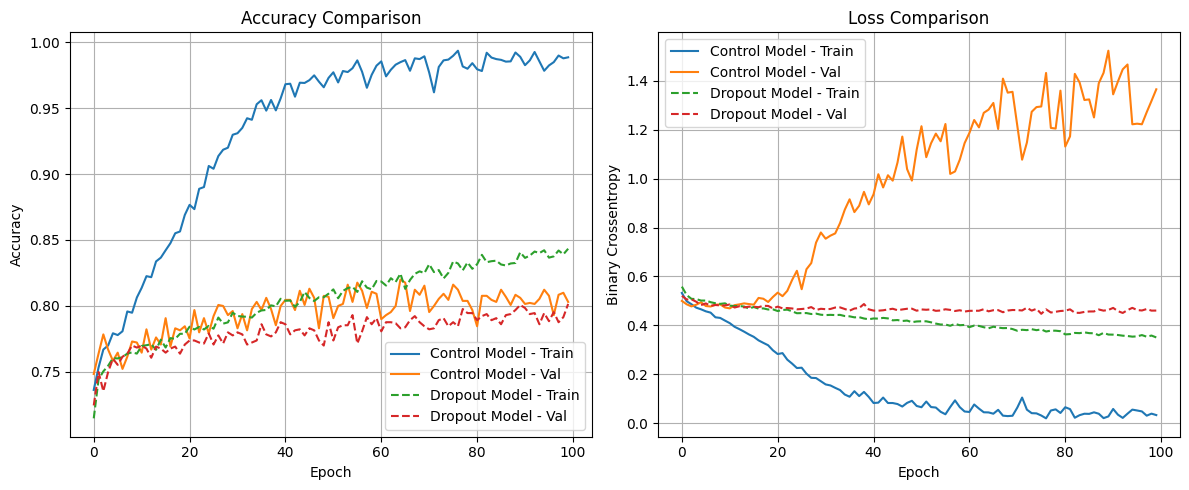

In [19]:
end = time.time()
plot_accuracy_and_loss(history, 'Control Model', dropout_history, 'Dropout Model')

Zastosowanie metody Dropout, ktora opiera sie na wylaczaniu neuronow podczas treningu bardzo poprawilo nasz model. Skutecznosc na zbiorze walidacyjnym jest bardzo podobna do sieci bez droupoutu, lecz po wykresie straty widzimy znaczną poprawę, dropout bardzo zmniejszył nam przeuczenie, co oznacza że będzie on dobrym parametrem do wprowadzenia w końcowej sieci.

# L2

In [20]:
from tensorflow.keras.regularizers import l2

l2_model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()

l2_history = l2_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()


Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7214 - loss: 0.9998 - val_accuracy: 0.7315 - val_loss: 0.6863
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7581 - loss: 0.6542 - val_accuracy: 0.7223 - val_loss: 0.6275
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7615 - loss: 0.5881 - val_accuracy: 0.7592 - val_loss: 0.5512
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7610 - loss: 0.5535 - val_accuracy: 0.7577 - val_loss: 0.5422
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7701 - loss: 0.5334 - val_accuracy: 0.7546 - val_loss: 0.5289
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7705 - loss: 0.5216 - val_accuracy: 0.7515 - val_loss: 0.5241
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7670 - loss: 0.5252 - val_accuracy: 0.7754 - val_loss: 0.5123
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7657 - loss: 0.5112 - val_accu

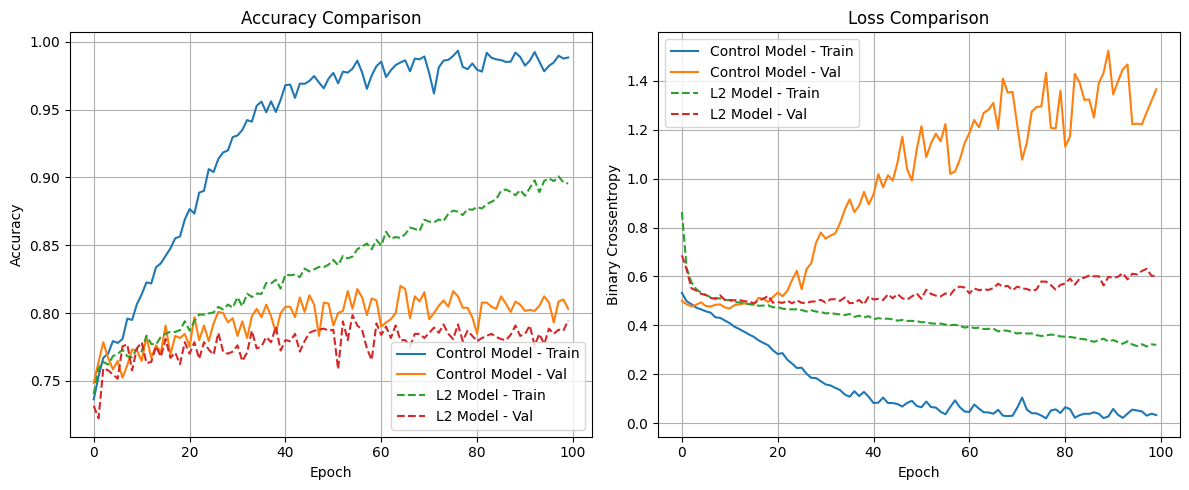

In [21]:
end = time.time()
plot_accuracy_and_loss(history, 'Control Model', l2_history, 'L2 Model')

# L1

L2 niestety w tym wypadku wypadla slabo...

POTENCJALNIE dzieje sie tak dlatego że l1 jest duzo bardziej brutalna niz l2, czyli l1 jest w stanie wycinac cale cechy ktore uznaje za niewartosciowe, i ktore moga negatywnie wplywac na uczenie sie modelu. l2 nie zeruje wag a zmniejsza je, co tutaj moze prowadzic do niesatysfakcjonujacego wyniku.

In [22]:
from tensorflow.keras.regularizers import l1

l1_model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l1(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(1, activation='sigmoid')
])

l1_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
l1_history = l1_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()


Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6950 - loss: 5.3833 - val_accuracy: 0.7331 - val_loss: 0.8085
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7468 - loss: 0.7435 - val_accuracy: 0.7446 - val_loss: 0.6418
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7434 - loss: 0.6368 - val_accuracy: 0.7485 - val_loss: 0.6149
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7664 - loss: 0.5966 - val_accuracy: 0.7462 - val_loss: 0.5920
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7530 - loss: 0.5921 - val_accuracy: 0.7315 - val_loss: 0.5889
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7581 - loss: 0.5865 - val_accuracy: 0.7477 - val_loss: 0.5812
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7593 - loss: 0.5862 - val_accuracy: 0.7577 - val_loss: 0.5713
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7522 - loss: 0.5812 - val_accu

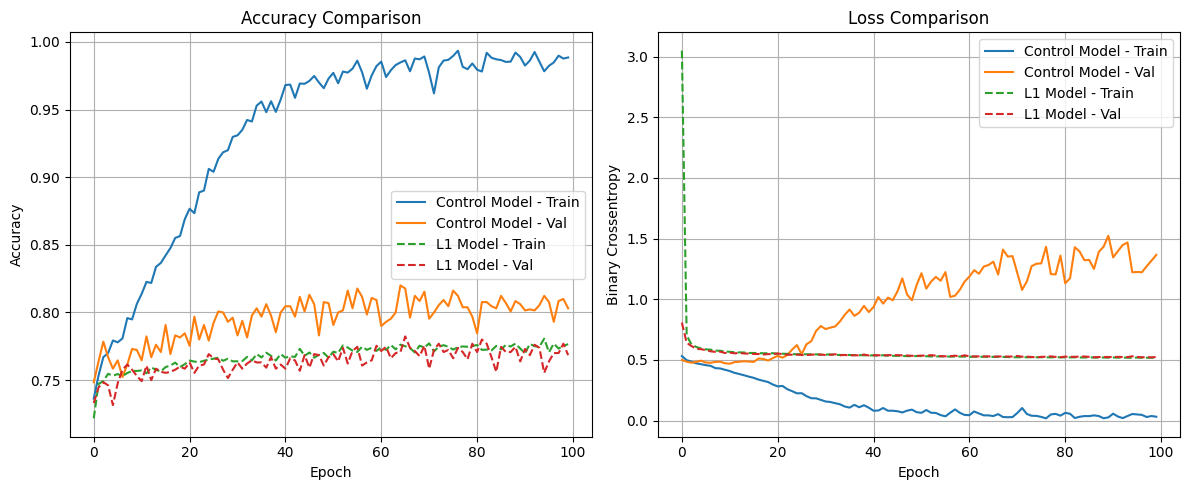

In [23]:
end = time.time()
plot_accuracy_and_loss(history, 'Control Model', l1_history, 'L1 Model')

# Early stopping

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

early_stop_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

start = time.time()

early_history = early_stop_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

end = time.time()

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7088 - loss: 0.5551 - val_accuracy: 0.7508 - val_loss: 0.4931
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7592 - loss: 0.4960 - val_accuracy: 0.7723 - val_loss: 0.4855
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7699 - loss: 0.4833 - val_accuracy: 0.7669 - val_loss: 0.4846
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7698 - loss: 0.4740 - val_accuracy: 0.7608 - val_loss: 0.4860
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7783 - loss: 0.4671 - val_accuracy: 0.7569 - val_loss: 0.4794
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7865 - loss: 0.4564 - val_accuracy: 0.7662 - val_loss: 0.4709
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7854 - loss: 0.4525 - val_accuracy: 0.7685 - val_loss: 0.4733
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7988 - loss: 0.4370 - val_accu

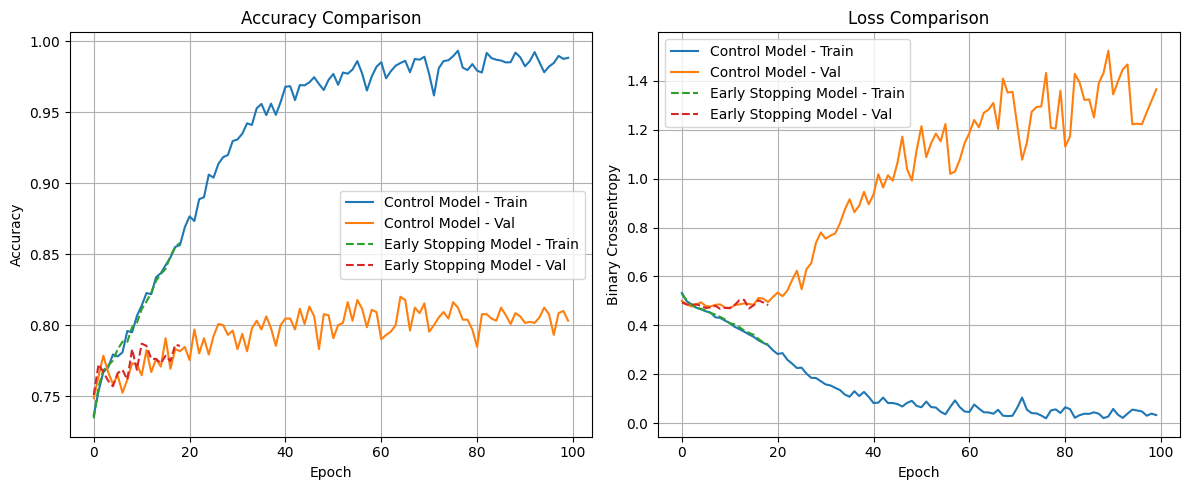

In [25]:
end = time.time()
plot_accuracy_and_loss(history, 'Control Model', early_history, 'Early Stopping Model')

Niestety sam early stopping to za malo zeby zapobiec przeuczaniu, jest to jednak swietna technika do laczenia z innymi

In [26]:
import time

combined_model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l1(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=l1(0.001)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

combined_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
combined_history = combined_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=1
)
end = time.time()



Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6659 - loss: 5.4138 - val_accuracy: 0.7508 - val_loss: 0.9483
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7435 - loss: 0.8446 - val_accuracy: 0.7438 - val_loss: 0.6565
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7491 - loss: 0.6503 - val_accuracy: 0.7308 - val_loss: 0.6187
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7498 - loss: 0.6265 - val_accuracy: 0.7423 - val_loss: 0.5948
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7366 - loss: 0.6137 - val_accuracy: 0.7454 - val_loss: 0.5882
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7283 - loss: 0.6101 - val_accuracy: 0.7454 - val_loss: 0.5787
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7273 - loss: 0.6098 - val_accuracy: 0.7508 - val_loss: 0.5717
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7451 - loss: 0.5962 - val_accu

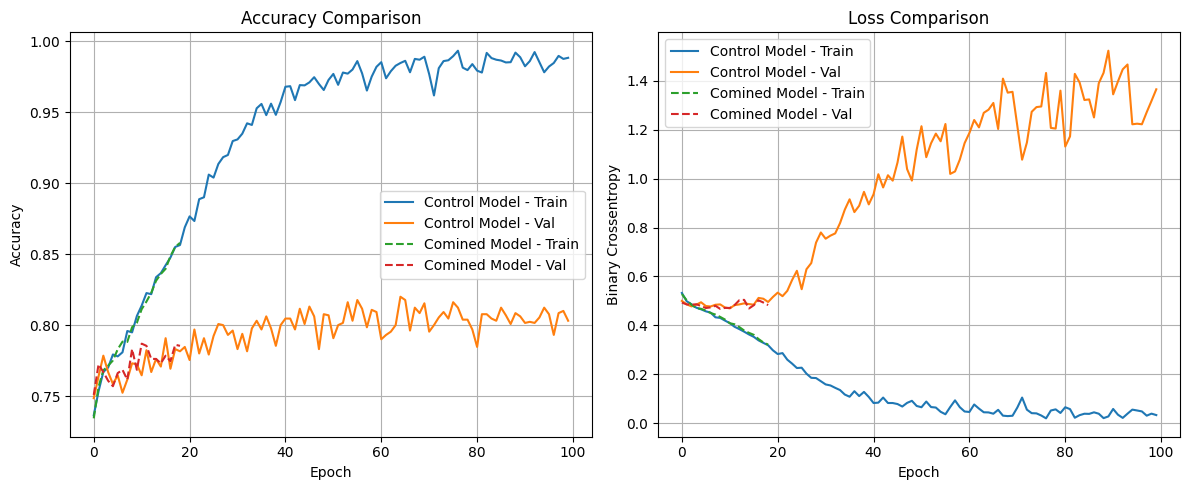

In [27]:
end = time.time()
plot_accuracy_and_loss(history, 'Control Model', early_history, 'Comined Model')

Pomimo że model bez żadnych metod regularizacji osiągnął najwyższy wynik na zbiorze walidacyjnym, jego duża rozbieżność między dokładnością treningową a walidacyjną świadczyła o przeuczeniu.
Metody takie jak Dropout, L1/L2 regularizacja oraz EarlyStopping znacząco ograniczyły overfitting kosztem nieznacznego spadku dokładności.
W praktyce modele regularizowane mogą być bardziej niezawodne przy generalizacji na nowe dane.

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    confusion_matrix, classification_report, precision_recall_curve,
    roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [29]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracies = []

for train_index, val_index in skf.split(X_train_scaled, y_train):
    X_cv_train, X_cv_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_cv_train, y_cv_val = y_train[train_index], y_train[val_index]

    model_cv = Sequential([
        Dense(512, activation='relu', kernel_regularizer=l1(0.001), input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.5),
        Dense(256, activation='relu', kernel_regularizer=l1(0.001)),
        Dropout(0.4),
        Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model_cv.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    model_cv.fit(X_cv_train, y_cv_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test_scaled, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    score = model_cv.evaluate(X_cv_val, y_cv_val, verbose=0)
    cv_accuracies.append(score[1])

print(f"Cross-validation accuracies: {cv_accuracies}")
print(f"Mean CV accuracy: {np.mean(cv_accuracies):.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-validation accuracies: [0.7692307829856873, 0.7509615421295166, 0.7738209962844849, 0.744947075843811, 0.7468720078468323]
Mean CV accuracy: 0.7572


Z cross validation wynika ze model generalizuje calkiem niezle, nie ma duzego rozrzutu pomiedzy danymi.

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


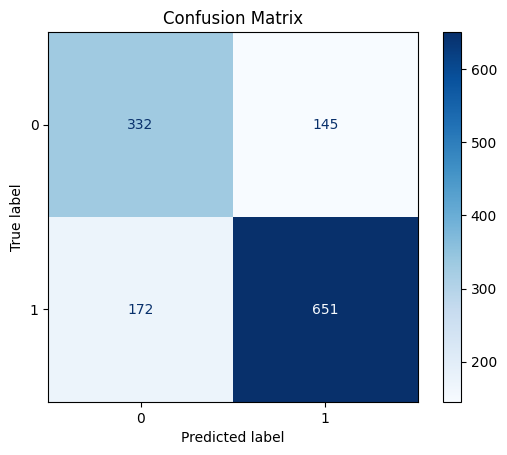

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       477
           1       0.82      0.79      0.80       823

    accuracy                           0.76      1300
   macro avg       0.74      0.74      0.74      1300
weighted avg       0.76      0.76      0.76      1300



In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = combined_model.predict(X_test_scaled)
y_pred_labels = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_labels))


Model osiągnął 75% skuteczności, jednak analiza metryk klasyfikacyjnych pokazuje, że lepiej radzi sobie z klasą oznaczającą wyższą jakość wina. Klasa o niższej jakości (0) charakteryzuje się niższą precyzją i recall, co oznacza, że model ma tendencję do ich mylenia z klasą 1. Może to wynikać z niewyraźnej separacji klas oraz większej liczby przykładów klasy 1.

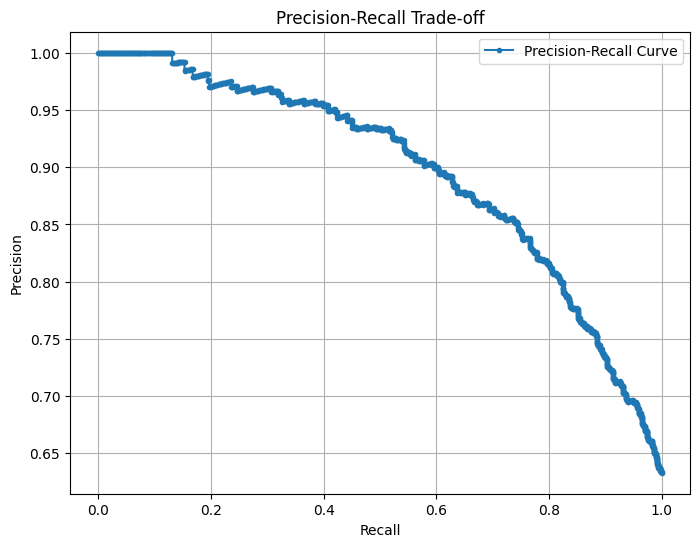

In [31]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Trade-off')
plt.grid(True)
plt.legend()
plt.show()


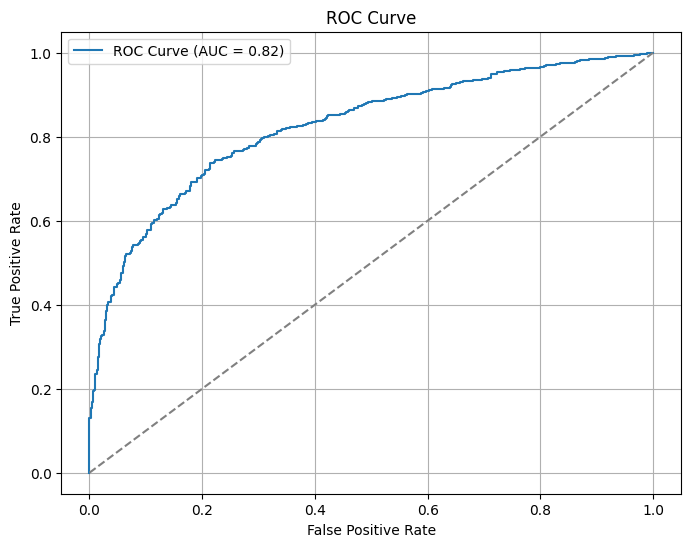

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7246 - loss: 0.5345 - val_accuracy: 0.7608 - val_loss: 0.4881
Epoch 2/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7676 - loss: 0.4822 - val_accuracy: 0.7692 - val_loss: 0.4723
Epoch 3/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7892 - loss: 0.4501 - val_accuracy: 0.7731 - val_loss: 0.4842
Epoch 4/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7967 - loss: 0.4415 - val_accuracy: 0.7792 - val_loss: 0.4667
Epoch 5/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8115 - loss: 0.4140 - val_accuracy: 0.7708 - val_loss: 0.4687
Epoch 6/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8147 - loss: 0.4112 - val_accuracy: 0.7815 - val_loss: 0.4726
Epoch 7/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8247 - loss: 0.3883 - val_accuracy: 0.7838 - val_loss: 0.4759
Epoch 8/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8435 - loss: 0.3536 - val_accu

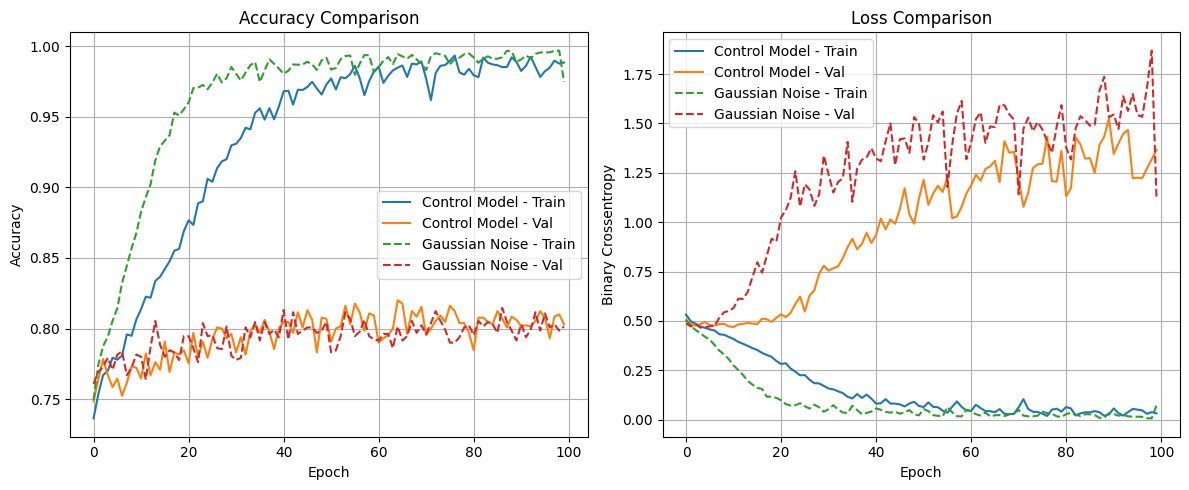

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import time


noise_level = 0.01
X_train_noisy = X_train_scaled + np.random.normal(
    loc=0.0, scale=noise_level, size=X_train_scaled.shape
)
y_train_noisy = y_train.copy()

X_train_aug = np.vstack([X_train_scaled, X_train_noisy])
y_train_aug = np.concatenate([y_train, y_train_noisy])

noise_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
noise_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

start = time.time()
noise_history = noise_model.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)
end = time.time()
print(f"Czas wykonania (model z noise): {end - start:.2f} s")



plot_accuracy_and_loss(history, 'Control Model', noise_history, 'Gaussian Noise')


Epoch 1/100
 34/206 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9948 - loss: 0.0079

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9972 - loss: 0.0067 - val_accuracy: 0.8092 - val_loss: 1.6882
Epoch 2/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9966 - loss: 0.0091 - val_accuracy: 0.8108 - val_loss: 1.6950
Epoch 3/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9976 - loss: 0.0053 - val_accuracy: 0.8031 - val_loss: 1.7722
Epoch 4/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9932 - loss: 0.0306 - val_accuracy: 0.8046 - val_loss: 1.5473
Epoch 5/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9877 - loss: 0.0489 - val_accuracy: 0.8154 - val_loss: 1.3376
Epoch 6/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9906 - loss: 0.0268 - val_accuracy: 0.8100 - val_loss: 1.2307
Epoch 7/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9889 - loss: 0.0406 - val_accuracy: 0.8108 - val_loss: 1.3948
Epoch 8/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9955 - loss: 0.0126 - val_accuracy: 0.8169

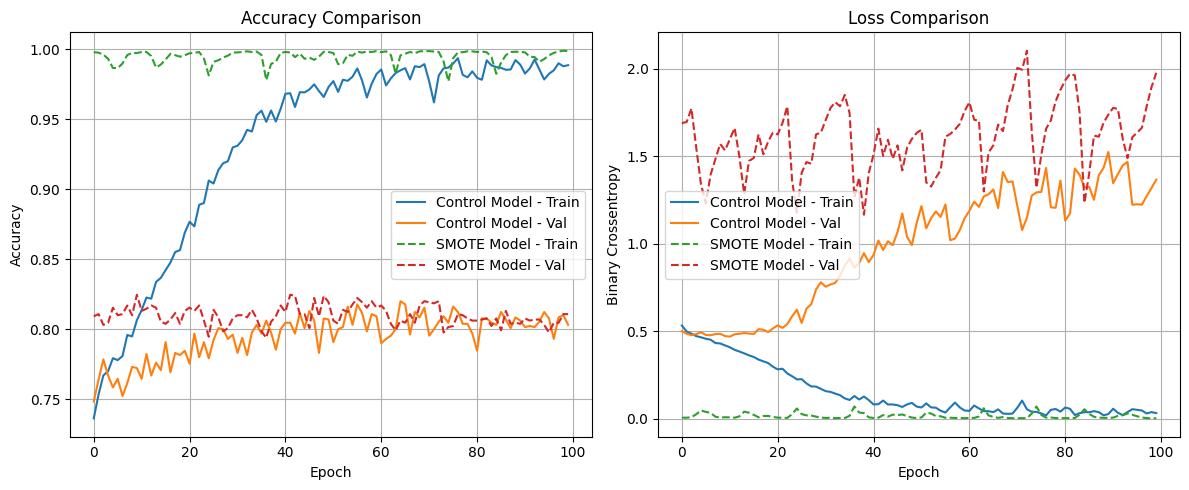

In [36]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train)

smote_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

smote_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

start = time.time()
smote_history = model.fit(
    X_train_smote, y_train_smote,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)
end = time.time()
print(f"Czas wykonania: {end - start:.2f} s")

plot_accuracy_and_loss(history, 'Control Model', smote_history, 'SMOTE Model')